In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/MSA_M2022_dl.xlsx")
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,17.7,26.44,37.86,21640,27440,36820,55000,78740,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,37.36,52.92,76.2,37140,53760,77720,110070,158500,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,35.15,52.3,77.42,30720,46640,73120,108780,161030,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,44.25,62.83,88.94,55450,66240,92040,130680,185000,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,40.4,61.07,76.85,45380,54090,84020,127030,159850,NaN,NaN


In [3]:
bloomington_df = df[df['AREA_TITLE'] == 'Bloomington, IN'] # creating bloomington df

In [4]:
pd.set_option('display.max_columns', None)
bloomington_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,NaN,NaN,26.69,55520,0.5,11.47,14.78,21.14,31.06,46.72,23850,30740,43970,64600,97180,NaN,NaN
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,NaN,NaN,53.6,111480,0.8,23.68,30.74,47.32,63.81,92.97,49260,63950,98430,132720,193380,NaN,NaN
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,NaN,NaN,56.68,117900,1.6,19.11,28.84,43.05,71.31,107.54,39750,59990,89540,148330,223680,NaN,NaN
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,NaN,NaN,63.06,131160,1.5,35.46,44.13,58.36,82.3,98.63,73770,91800,121400,171180,205140,NaN,NaN
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,NaN,NaN,60.81,126480,3.3,23.75,33.23,54.03,82,102.11,49400,69130,112380,170560,212390,NaN,NaN


In [5]:
# We can drop PCT_TOTAL, PCT_RPT, HOURLY columns (blanks values for each occupation)
# We could also fill ANNUAL with "FALSE" for missing values

# Dropping the 'PCT_TOTAL', 'PCT_RPT', 'HOURLY' columns
bloomington_df.drop(['PCT_TOTAL', 'PCT_RPT', 'HOURLY'], axis=1, inplace=True)

# Fill missing values in 'ANNUAL' column with "FALSE"
bloomington_df['ANNUAL'].fillna('FALSE', inplace=True)

print(bloomington_df.isnull().sum()) # lets verify the changes

AREA            0
AREA_TITLE      0
AREA_TYPE       0
PRIM_STATE      0
NAICS           0
NAICS_TITLE     0
I_GROUP         0
OWN_CODE        0
OCC_CODE        0
OCC_TITLE       0
O_GROUP         0
TOT_EMP         0
EMP_PRSE        0
JOBS_1000       0
LOC_QUOTIENT    0
H_MEAN          0
A_MEAN          0
MEAN_PRSE       0
H_PCT10         0
H_PCT25         0
H_MEDIAN        0
H_PCT75         0
H_PCT90         0
A_PCT10         0
A_PCT25         0
A_MEDIAN        0
A_PCT75         0
A_PCT90         0
ANNUAL          0
dtype: int64


In [6]:
# Columns to replace * with NaN
wage_columns = [
    'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
    'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Replacing '*' with NaN for the specified columns in the original DataFrame
for column in wage_columns:
    bloomington_df[column] = bloomington_df[column].replace('*', np.nan)

In [7]:
bloomington_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,26.69,55520.0,0.5,11.47,14.78,21.14,31.06,46.72,23850.0,30740.0,43970.0,64600,97180,FALSE
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,53.60,111480.0,0.8,23.68,30.74,47.32,63.81,92.97,49260.0,63950.0,98430.0,132720,193380,FALSE
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,56.68,117900.0,1.6,19.11,28.84,43.05,71.31,107.54,39750.0,59990.0,89540.0,148330,223680,FALSE
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,63.06,131160.0,1.5,35.46,44.13,58.36,82.3,98.63,73770.0,91800.0,121400.0,171180,205140,FALSE
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,60.81,126480.0,3.3,23.75,33.23,54.03,82,102.11,49400.0,69130.0,112380.0,170560,212390,FALSE


In [8]:
all_occupations_row = bloomington_df.head(1)
all_occupations_row

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,26.69,55520.0,0.5,11.47,14.78,21.14,31.06,46.72,23850.0,30740.0,43970.0,64600,97180,FALSE


# Salary Brackets

In [9]:
quotient_df = bloomington_df.drop(bloomington_df.index[0])
quotient_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,53.60,111480.0,0.8,23.68,30.74,47.32,63.81,92.97,49260.0,63950.0,98430.0,132720,193380,FALSE
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,56.68,117900.0,1.6,19.11,28.84,43.05,71.31,107.54,39750.0,59990.0,89540.0,148330,223680,FALSE
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,63.06,131160.0,1.5,35.46,44.13,58.36,82.3,98.63,73770.0,91800.0,121400.0,171180,205140,FALSE
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,60.81,126480.0,3.3,23.75,33.23,54.03,82,102.11,49400.0,69130.0,112380.0,170560,212390,FALSE
14680,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,detailed,170,0.6,2.404,5.53,58.02,120690.0,0.8,38.57,47.32,49.78,62.93,81.71,80230.0,98430.0,103540.0,130890,169960,FALSE


In [10]:
unique_mean_wages = quotient_df['A_MEAN'].unique()
print(unique_mean_wages)

[111480. 117900. 131160. 126480. 120690. 104120. 113350. 129620. 118360.
 126870. 106960.  99970. 123910.  93730.  91800. 132770.  64710. 113780.
 131780.  69280.  70920. 121930.  74970.  69100.  76670.  83850.  71830.
  63420.  81960.  96990.  88570.  49860.  51460.  72060.  73350.  70550.
  71640.  44540.  91130.  99680.  97770.  65370.  79310.  97510.  59080.
  61990. 100500.  93860.  88150.  76950.  99600.  60660.  66130.  75230.
  80350.  93970.  68590.  93040. 106330.  82010.  88090.  67060.  70560.
  52540.  60850.  71760. 113340.  75730.  80870.  70570.  77420.  56330.
  52750.  54990.  47740.  50030.  55730.  42650.  57000.  62090.  35740.
 106790. 137710.  49390.  68330.  91950.  30820.  56020.  54970.  57290.
  53700.  37410.  38900.  29030.  59840.  70450.  26210.  62310.  47900.
  38420.  63400.  76090.  69800.  60390.  79990.  49130.  94560.     nan
 127470. 120890.  88770.  88100.  83690. 106670.  72720. 117470. 282210.
  76250.  49930.  65820.  37360.  36600.  35100.  5

In [11]:
# Assuming unique_mean_wages already contains the unique values from the 'A_MEAN' column
min_value = min(unique_mean_wages)
max_value = max(unique_mean_wages)

print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Minimum Value: 21800.0
Maximum Value: 282210.0


In [25]:
quotient_df['salary_bracket'] = pd.cut(quotient_df['A_MEAN'],
                                       bins=[0, 50000, 63300, 75000, 100000, 125000, 150000, 175000, 200000, np.inf],
                                       labels=['0-50k', '50k-63.3k', '63.3k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k+'])

# Display the updated DataFrame
print(quotient_df[['OCC_TITLE', 'TOT_EMP', 'A_MEAN', 'salary_bracket']].head())

                             OCC_TITLE TOT_EMP    A_MEAN salary_bracket
14676           Management Occupations    4340  111480.0      100k-125k
14677  General and Operations Managers    1150  117900.0      100k-125k
14678               Marketing Managers     120  131160.0      125k-150k
14679                   Sales Managers     130  126480.0      125k-150k
14680        Public Relations Managers     170  120690.0      100k-125k


In [26]:
mean_brackets = quotient_df[['OCC_TITLE', 'TOT_EMP', 'A_MEAN', 'salary_bracket']]
mean_brackets

,OCC_TITLE,TOT_EMP,A_MEAN,salary_bracket
14676,Management Occupations,4340,111480.0,100k-125k
14677,General and Operations Managers,1150,117900.0,100k-125k
14678,Marketing Managers,120,131160.0,125k-150k
14679,Sales Managers,130,126480.0,125k-150k
14680,Public Relations Managers,170,120690.0,100k-125k
...,...,...,...,...
14952,Industrial Truck and Tractor Operators,200,40860.0,0-50k
14953,Cleaners of Vehicles and Equipment,100,30840.0,0-50k
14954,"Laborers and Freight, Stock, and Material Move...",1190,37180.0,0-50k
14955,"Packers and Packagers, Hand",330,38240.0,0-50k


In [27]:
salary_bracket_counts = quotient_df['salary_bracket'].value_counts()
print(salary_bracket_counts)

salary_bracket
0-50k        131
50k-63.3k     51
75k-100k      38
63.3k-75k     33
100k-125k     17
125k-150k      8
200k+          1
150k-175k      0
175k-200k      0
Name: count, dtype: int64


In [29]:
mean_brackets.to_csv('mean_brackets.csv', index=False) # above results to csv

In [30]:
csv_file_path_mean_brackets = '/content/mean_brackets.csv'

csv_file = pd.read_csv(csv_file_path_mean_brackets)

excel_file = 'mean_brackets.xlsx'

csv_file.to_excel(excel_file, index=False) # csv to excel

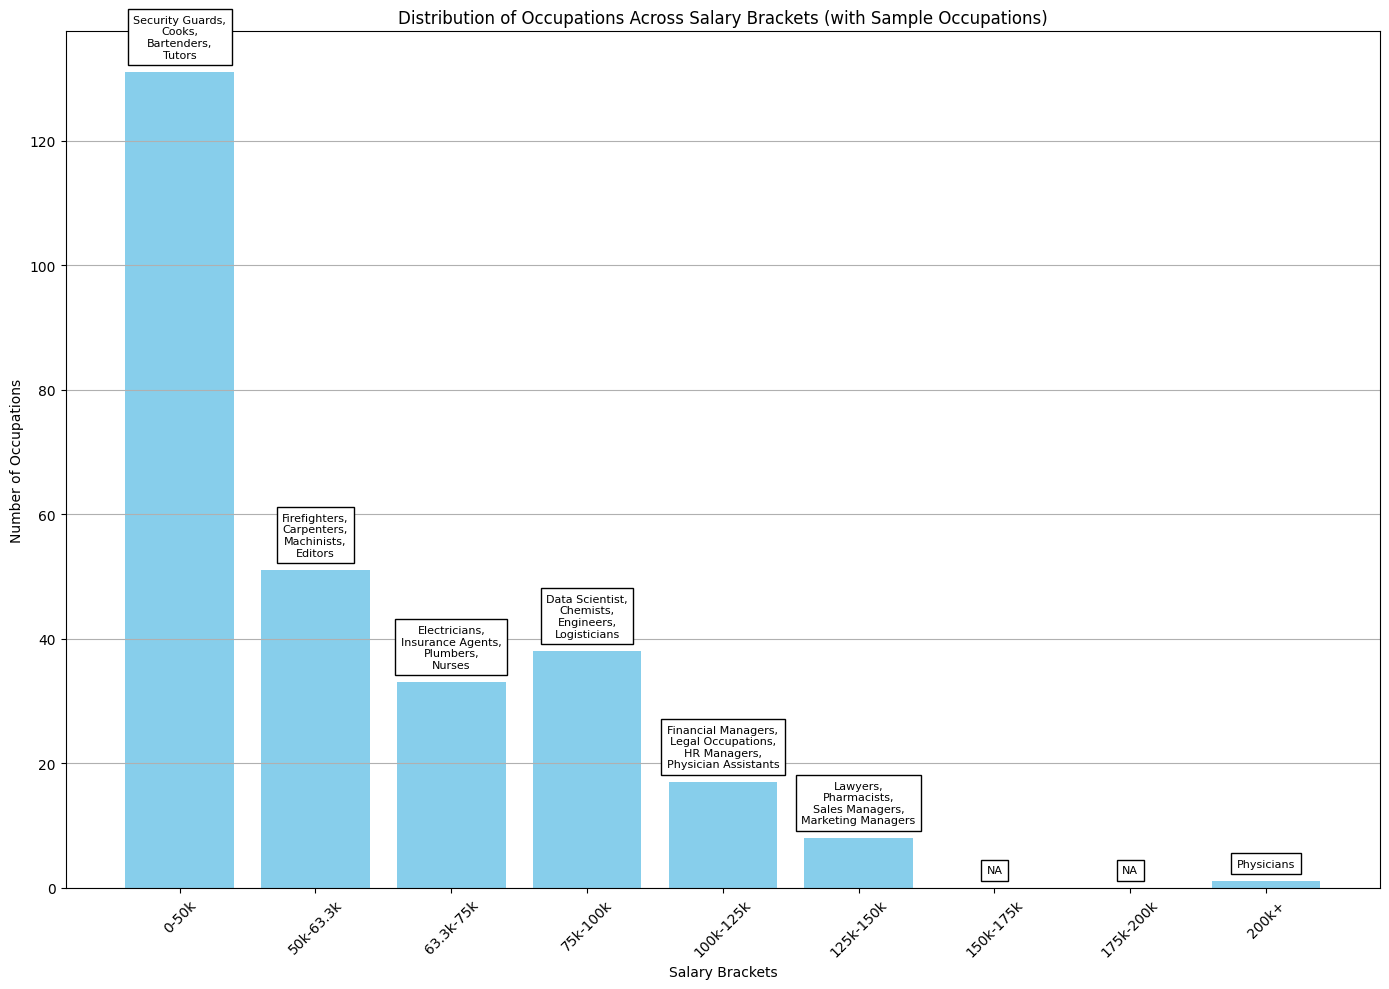

In [37]:
salary_brackets = [
    '0-50k', '50k-63.3k', '63.3k-75k', '75k-100k',
    '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k+'
]
occupation_counts = [131, 51, 33, 38, 17, 8, 0, 0, 1]

# Provided sample occupation titles, split with line breaks
occupation_titles = [
    "Security Guards,\nCooks,\nBartenders,\nTutors",  # '0-50k'
    "Firefighters,\nCarpenters,\nMachinists,\nEditors",  # '50k-63.3k'
    "Electricians,\nInsurance Agents,\nPlumbers,\nNurses",  # '63.3k-75k'
    "Data Scientist,\nChemists,\nEngineers,\nLogisticians",  # '75k-100k'
    "Financial Managers,\nLegal Occupations,\nHR Managers,\nPhysician Assistants",  # '100k-125k'
    "Lawyers,\nPharmacists,\nSales Managers,\nMarketing Managers",  # '125k-150k'
    "NA",  # '150k-175k'
    "NA",  # '175k-200k'
    "Physicians"  # '200k+'
]

# Create the bar chart
plt.figure(figsize=(14, 10))
bars = plt.bar(salary_brackets, occupation_counts, color='skyblue')

# Annotate occupation titles in boxes beneath each bar
for bar, title in zip(bars, occupation_titles):
    # Positioning the text box just below the top of the bar
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, title, ha='center', va='bottom',
             rotation=0, color='black', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))

# Add labels and title
plt.xlabel('Salary Brackets')
plt.ylabel('Number of Occupations')
plt.title('Distribution of Occupations Across Salary Brackets (with Sample Occupations)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout to fit annotations
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
# Grouping the data by occupation and salary bracket and counting the occurrences
grouped = quotient_df.groupby(['OCC_TITLE', 'salary_bracket']).size().reset_index(name='count')

pivot_table = grouped.pivot(index='OCC_TITLE', columns='salary_bracket', values='count').fillna(0)

pivot_table

salary_bracket,0-50k,50k-63.3k,63.3k-75k,75k-100k,100k-125k,125k-150k,150k-175k,175k-200k,200k+
OCC_TITLE,,,,,,,,,
Accountants and Auditors,0,0,1,0,0,0,0,0,0
Administrative Services Managers,0,0,0,0,1,0,0,0,0
Amusement and Recreation Attendants,1,0,0,0,0,0,0,0,0
Animal Caretakers,1,0,0,0,0,0,0,0,0
"Architects, Except Landscape and Naval",0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Waiters and Waitresses,1,0,0,0,0,0,0,0,0
Water and Wastewater Treatment Plant and System Operators,0,1,0,0,0,0,0,0,0
Web and Digital Interface Designers,0,1,0,0,0,0,0,0,0


In [40]:
pivot_table.to_csv('pivot_table.csv') # above results to csv

In [41]:
csv_file_path_pivot = '/content/pivot_table.csv'

csv_file = pd.read_csv(csv_file_path_pivot)

excel_file = 'pivot.xlsx'

# Write the DataFrame to an Excel file
csv_file.to_excel(excel_file, index=False)